In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [55]:
#Statement to read a csv file into a dataframe
DataFrame = pd.read_csv('data.csv')

In [56]:
#since i found that the Recovered Column had some N/A values so i replaced those value with zero using fillna(0)
DataFrame['Recovered'] = DataFrame['Recovered'].fillna(0)

In [57]:
#Statement to check for number of n/a
DataFrame.isna().sum()

Date                   0
Country/Region         0
Province/State    159120
Confirmed              0
Recovered              0
Deaths                 0
dtype: int64

 Merge the data for countries with multiple regions in order to provide a single time-series
for each country.

In [58]:
#grouping Date and Country/Region for Confirmed,Recovered, and Deaths
#This way we can provide a single time series for each country
fg = DataFrame.groupby(['Date','Country/Region'])[['Confirmed','Recovered','Deaths']].sum().reset_index()
#Statement to convert string value to Date Format
fg['Date'] = pd.to_datetime(fg['Date'])
o = fg

Plot a graph of the number of confirmed cases over time for each country. Which countries present exponential growth in the number of cases and which countries are already leaving exponential growth?

In [59]:
#First we can set index of CasesOverTime as Date
CasesOverTime = fg
CasesOverTime.set_index("Date",inplace = True)

In [60]:
#We can then get a dataframe with Country/Region and Confirmed Cases and ignoring rest
CasesOverTime = CasesOverTime[['Country/Region','Confirmed']]


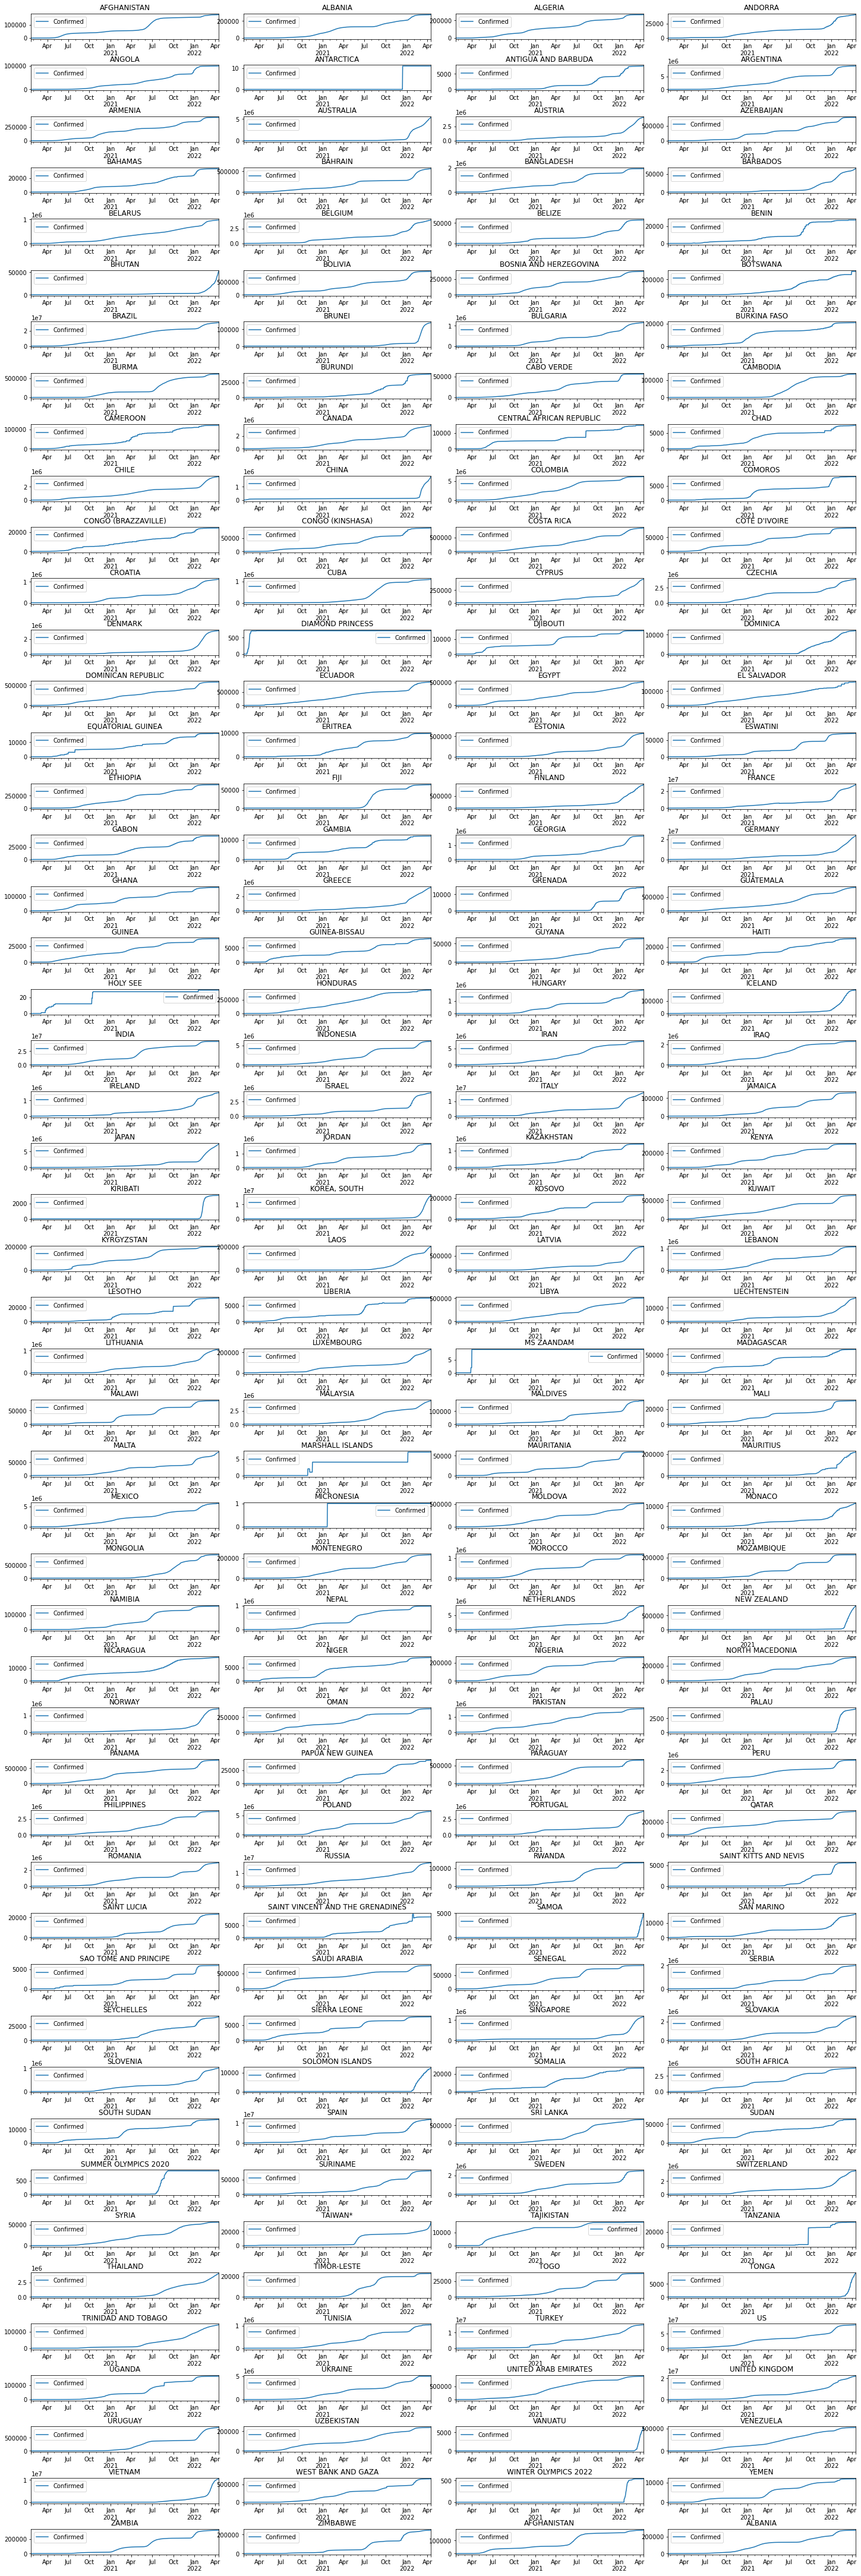

In [61]:
#NOTE*** : It will take some time to return the subplots
# define subplot grid
fig, axs = plt.subplots(nrows=50, ncols=4, figsize=(20, 60))
#The tight_layout() function in pyplot module of matplotlib library is used to 
#automatically adjust subplot parameters to give specified padding
plt.tight_layout()  
plt.subplots_adjust(hspace=1)#hspace 
# loop through tickers and axes
for ticker, ax in zip(CasesOverTime["Country/Region"], axs.ravel()):
    # filter CasesOverTime for ticker and plot on specified axes
    CasesOverTime[CasesOverTime["Country/Region"] == ticker].plot(ax=ax)
    # chart formatting
    ax.set_title(ticker.upper())
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.show()



Countries that shows exponential growth over the months   :  

Antartica,Australia,Austria,Barados,Benin,Bhutan,Brunei,Burundi,Cambodia,China,Cuba,Cyprus,Denmark,Dominica,Fiji,Finland,France,Greece,Iceland,Israel,Italy,Japan,Kiribati,South Korea,Laos,Latvia,Lechtenstein,Lithuania,Ms Zaandam,Malaysia,Maldives,Mauritius,Micronesia,Mongolia,Mozambique,New Zealand,Norway,Palau,Samoa,Seychelles,Singapore,Solomon Island,Tonga,Vnuatu,Vietnam,Winter Olympics 2022,

----------------------------------------------------------------------------------------------------------------

Countries that shows leaving exponential growth  : 

Antartica,Benin,Combodia,Diamond Princess,Ms Zaandam,Mali,Rwandia,Saint Kitts and Nevis,Saint Lucia,Sao Tome and Principe,Sierra Leona,Summer Olympics 2020,Suriname,Sweden,Tajikistan,Tanzania,Togo,Tunisha,US,Uganda,Ukraine,United Arab Emirates,Uzbekisthan,Winter Olympics 2022

In [62]:
#statement to reset index for fg 
fg.reset_index(inplace = True)

4. Print the total number of confirmed cases and number of deaths in each country in the
   last reported day. What are the 10 countries with the highest number of confirmed
   COVID-19 cases? What are the 10 countries with the highest number of deaths?

In [63]:
fg.sort_values("Date", ascending = False).head(5) #Here we know that the last reported day was 2022-04-16

,Date,Country/Region,Confirmed,Recovered,Deaths
161567,2022-04-16,Zimbabwe,247237,0.0,5462
161443,2022-04-16,Guinea-Bissau,8176,0.0,170
161441,2022-04-16,Guatemala,837492,0.0,17427
161440,2022-04-16,Grenada,14165,0.0,219
161439,2022-04-16,Greece,3232496,0.0,28537


In [73]:
totalConfirmedCases = fg[fg.Date == '2022-04-16']#We look for data of Confirmed and Deaths for last reported day
totalConfirmedCases=totalConfirmedCases[['Date','Country/Region','Confirmed','Deaths']]
totalConfirmedCases

,Date,Country/Region,Confirmed,Deaths
161370,2022-04-16,Afghanistan,178387,7676
161371,2022-04-16,Albania,274462,3496
161372,2022-04-16,Algeria,265739,6874
161373,2022-04-16,Andorra,40709,153
161374,2022-04-16,Angola,99194,1900
...,...,...,...,...
161563,2022-04-16,West Bank and Gaza,656617,5656
161564,2022-04-16,Winter Olympics 2022,535,0
161565,2022-04-16,Yemen,11817,2148
161566,2022-04-16,Zambia,318467,3973


What are the 10 countries with the highest number of confirmed COVID-19 cases?

In [77]:
totalConfirmedCases = fg.groupby(['Country/Region'])[['Country/Region','Confirmed','Deaths']].sum().reset_index()
totalConfirmedCases.nlargest(10,'Confirmed')#statement to find the top 10 largest value in column Confirmed


,Country/Region,Confirmed,Deaths
183,US,22963151317,368024697
80,India,14681429726,192264062
24,Brazil,9991736059,264795351
63,France,4588778075,62237882
187,United Kingdom,4376490715,75343186
145,Russia,4055403879,97041399
182,Turkey,3505368946,29977822
67,Germany,3007332317,46750203
86,Italy,2914673720,70245227
165,Spain,2754459962,47685434


 What are the 10 countries with the highest number of deaths?

In [78]:
totalConfirmedCases.nlargest(10,'Deaths')#statement to find the top 10 largest value in column Deaths


,Country/Region,Confirmed,Deaths
183,US,22963151317,368024697
24,Brazil,9991736059,264795351
80,India,14681429726,192264062
116,Mexico,1726825683,133519933
139,Peru,1170867521,100102224
145,Russia,4055403879,97041399
187,United Kingdom,4376490715,75343186
86,Italy,2914673720,70245227
63,France,4588778075,62237882
38,Colombia,2167037165,54481320


----------------------------

Create a bar plot that shows the number of deaths per 100 confirmed cases (observed
case-fatality ratio) for the 20 most affected countries. See Figure 1 for an example.

In [118]:
#This statement gives the sum of confirmed and deaths cases for each country
#for the entire duration of covid pandemic 
p = fg.groupby(["Country/Region"]).agg({'Confirmed':'sum','Deaths':'sum'})


In [119]:
#statement to create a new column in a data frame with respect to column Deaths and Confirmed Cases
# 100 is multiplied to compute the percentage 
p['Case-Fatality'] = p['Deaths']/p['Confirmed'] * 100
#We want percentage value to be on format eg -> (2.22%), hence we use statement :  .round(decimals = 2)
p['Case-Fatality'] = (p['Case-Fatality'].round(decimals = 2))
#Now since we have a modified dataframe, we can return the Top 20 largest
p =p.nlargest(20,"Case-Fatality")
#Now we can sort the top 20 values for Case-Fatality in ascending order
p.sort_values(by = ['Case-Fatality'])


,Confirmed,Deaths,Case-Fatality
Country/Region,,,
Burma,170851763,5576309,3.26
North Macedonia,93255329,3062649,3.28
Malawi,26040368,859016,3.30
Bolivia,257271038,9148253,3.56
Chad,2737971,99316,3.63
Niger,3277860,121057,3.69
Bulgaria,278039125,10575086,3.80
Bosnia and Herzegovina,119258363,5099920,4.28
Afghanistan,66031705,2874099,4.35


In [120]:
import matplotlib.ticker as mtick 

<Figure size 432x288 with 0 Axes>

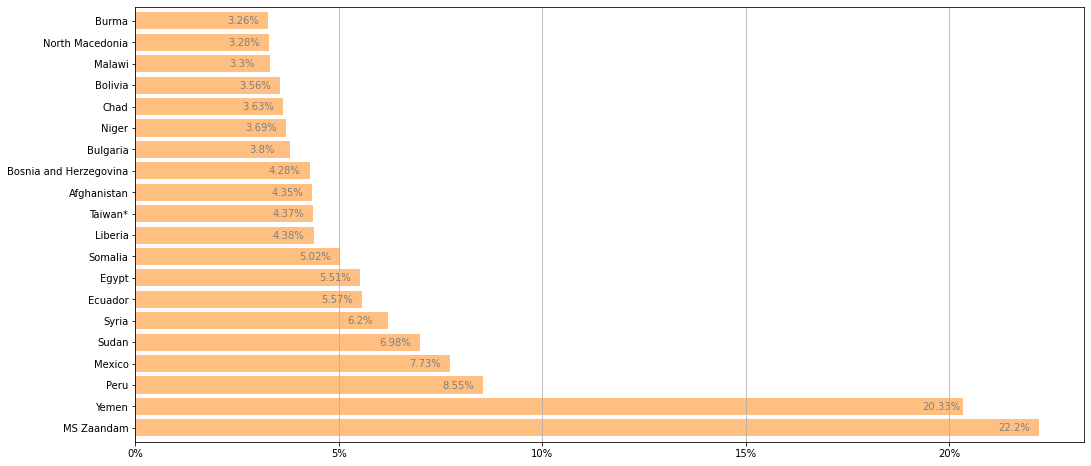

In [121]:
plt.figure()
#plotting horizontal bar 
p.plot(y = "Case-Fatality",kind = 'barh',figsize = (17,8),width = 0.8,color = '#ffbf80')
#The gca() function in pyplot module of matplotlib library is used to get the current Axes
#instance on the current figure
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=100,decimals=0))
plt.gca().xaxis.grid(True)    
for i in plt.gca().patches:
    plt.text(i.get_width()-1, i.get_y()+0.25,
             str(round((i.get_width()), 2))+"%",
             fontsize=10, fontweight='light',
             color='grey')
plt.ylabel("")
#removing the legend
plt.gca().get_legend().remove()
plt.show()




Compute the ratio between the total number of confirmed cases and the population
size of each country. The file worldpopulation.json contains data on the population
size of each country. Note that countries may have different names in different data
sets (e.g., United Kingdom/U.K., US/USA/U.S.). What are the 10 countries with the
highest number of confirmed COVID-19 cases per capita?

In [122]:
#loading the json file in a dataframe population
population = pd.read_json('worldpopulation.json')

In [123]:
population

,Rank,country,population,World
0,1,China,1388232693,0.185
1,2,India,1342512706,0.179
2,3,U.S.,326474013,0.043
3,4,Indonesia,263510146,0.035
4,5,Brazil,211243220,0.028
...,...,...,...,...
190,191,San Marino,32104,0.000
191,192,Palau,21726,0.000
192,193,Nauru,10301,0.000
193,194,Tuvalu,9975,0.000


In [124]:
#since country and population was in small case therefore we rename it as according to main data frame
population.rename(columns = {'country':'Country/Region','population':'Population'}, inplace = True)

In [125]:
b = population[['Country/Region','Population']]
#manually changing names of the Country with respect to main data frame fg
dict = {"U.S.":"US","Viet Nam":"Vietnam","DR Congo":"Congo","U.K.":"United Kingdom","Côte d'Ivoire":"Cote d'Ivoire","TFYR Macedonia":"North Macedonia","Swaziland":"Eswatini","St. Vincent & Grenadines":"Saint Vincent and the Grenadines"}
#replacing Country/Region values with a dict values
b = b.replace({"Country/Region":dict})
#creating a new data frame and merging fg and b on Country/Region 
fg = fg.groupby(['Country/Region'])[['Country/Region','Confirmed','Deaths']].sum().reset_index()
ratio =pd.merge(fg,b, on ='Country/Region')

In [126]:
#Now creating a new column as Cases-Ratio with respect to Confirmed Cases and Population of the country
ratio['Cases-Ratio']=ratio['Confirmed']/ratio['Population']

In [127]:
ratio.nlargest(10,'Cases-Ratio')

,Country/Region,Confirmed,Deaths,Population,Cases-Ratio
3,Andorra,9598486,75889,68728,139.659033
142,San Marino,3475610,54985,32104,108.260964
112,Montenegro,65674682,903774,626250,104.869752
101,Maldives,39401020,96263,375867,104.827027
12,Bahrain,140972915,570784,1418895,99.354015
150,Slovakia,502119526,6072231,5432157,92.434649
151,Slovenia,188345296,2355161,2071252,90.933067
147,Seychelles,8841994,40005,97539,90.650858
79,Israel,730904245,3777506,8323248,87.814786
60,Georgia,328321550,4110187,3972532,82.647931


ADDITIONAL RESEARCH QUESTION 

1) Compute the maximum number of Confirmed Cases and Deaths in each Country

In [116]:
#o=fg (previosuly assigned)
#Statement to find the maximum number of Confirmed and Deaths Cases for each country 
#over the duration of covid pandemic
o.groupby(['Country/Region']).agg({'Confirmed':['max'],'Deaths':['max']})

,Confirmed,Deaths
,max,max
Country/Region,,
Afghanistan,178387,7676
Albania,274462,3496
Algeria,265739,6874
Andorra,40709,155
Angola,99194,1900
...,...,...
West Bank and Gaza,656617,5656
Winter Olympics 2022,535,0


2) Which top 10 Country had the minumum Confirmed Cases on 2022-01-01

In [98]:
#Statement to find the top 10 minimum number of Confirmed Cases for each country on 2022-01-01
o[o['Date']=='2022-01-01'].nsmallest(10,'Confirmed')[['Date','Country/Region','Confirmed']]


,Date,Country/Region,Confirmed
140774,2022-01-01,Winter Olympics 2022,0
140697,2022-01-01,Micronesia,1
140759,2022-01-01,Tonga,1
140672,2022-01-01,Kiribati,2
140730,2022-01-01,Samoa,3
140693,2022-01-01,Marshall Islands,4
140770,2022-01-01,Vanuatu,7
140686,2022-01-01,MS Zaandam,9
140585,2022-01-01,Antarctica,11
140715,2022-01-01,Palau,12


3) Plot a line graph to show the Confirmed Cases,Deaths and Recovery of US population over the duration of Covid pandemic

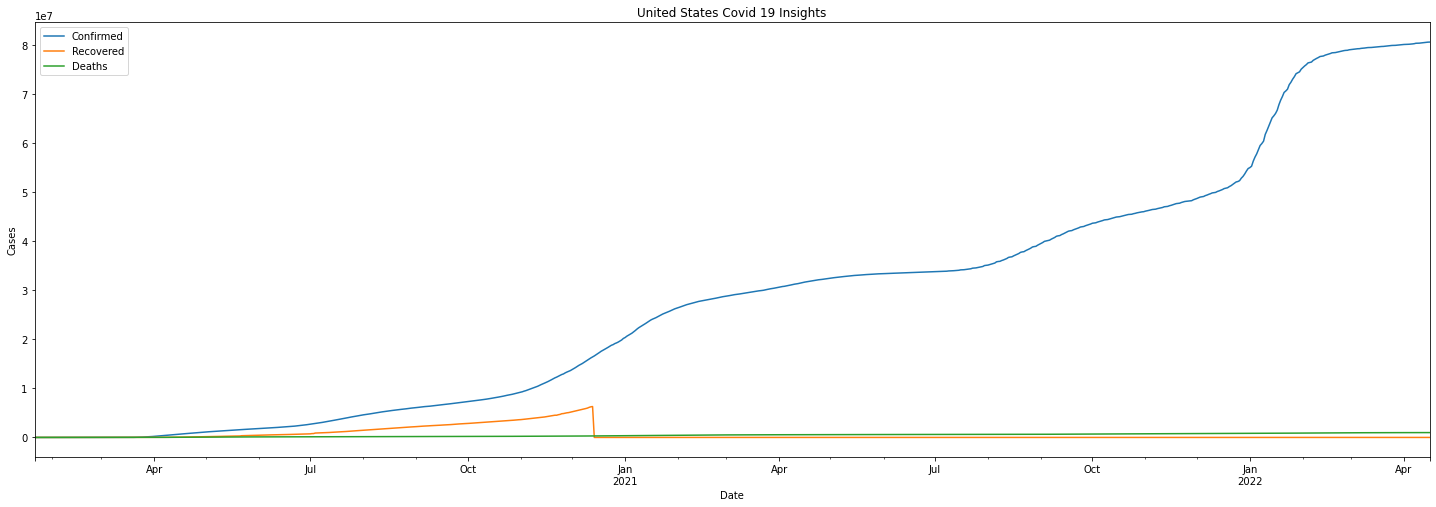

In [99]:
#Statement to select country US for the dataframe and group by date
US_covid19=o[o['Country/Region']== 'US'].groupby(['Date']).sum()
ax=US_covid19.plot(figsize=(25,8))
#labeling
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.title.set_text('United States Covid 19 Insights')
plt.show()